# Goal of the Competition
The goal of this competition is to predict if a person has any of three medical conditions. You are being asked to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0). You will create a model trained on measurements of health characteristics.

To determine if someone has these medical conditions requires a long and intrusive process to collect information from patients. With predictive models, we can shorten this process and keep patient details private by collecting key characteristics relative to the conditions, then encoding these characteristics.

In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [2]:
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [6]:
#Standard libraries for data visualization:
import seaborn as sn
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [7]:
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [8]:
os.chdir('C:\\Users\\Pinak//ICR_Identify')

In [46]:
traindata = pd.read_csv('train.csv')

In [10]:
traindata

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.238680,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.238680,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.238680,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.238680,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.238680,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,21.1860,167.877117,27.287375,365.516874,257.432377,41.368691,0.691257,55.163024,4.780452,0.013930,1.177525,0.698250,40.159779,1.070298,7.030640,21.75904,355.930925,0.238680,0.445479,176.977590,90.91832,27.957928,0.005518,2.41906,32.508604,8.015112,1.354416,495.086300,0.003042,A,51.618996,78.526968,65.821872,29.708112,0.296850,17167.209610,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,27.1887,285.628059,344.644105,505.006814,257.432377,61.910576,0.772304,85.233928,6.682597,0.038208,1.050225,0.761025,39.852923,2.146113,33.648

In [11]:
greeks = pd.read_csv('greeks.csv')

In [12]:
greeks

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [13]:
submission = pd.read_csv('sample_submission.csv')

In [14]:
submission

,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5


In [15]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [16]:
#Check Null Values
traindata.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [17]:
traindata.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,615.000000,614.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,21.419492,231.322223,98.328737,1218.133238,550.632525,77.104151,0.688801,90.251735,11.241064,0.030615,1.403761,0.742262,36.917590,1.383792,27.165653,51.128326,401.901299,0.633884,0.367002,146.972099,94.795377,26.370568,1.802900,1.924830,26.388989,9.072700,3.064778,1731.248215,0.305107,69.582596,105.060712,69.117005,71.341526,6.930086,10306.810737,10.111079,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,3.478278,183.992505,96.479371,7575.293707,2076.371275,159.049302,0.263994,51.585130,13.571133,0.014808,1.922210,0.281195,17.266347,0.538717,14.645993,21.210888,317.745623,1.912384,0.112989,86.084419,28.243187,8.038825,9.034721,1.484555,18.116679,6.200281,2.058344,1790.227476,1.847499,38.555707,68.445620,390.187057,165.551545,64.754262,11331.294051,2.934025,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,9.886800,72.948951,1.331155,51.216883,257.432377,12.499760,0.176874,23.387600,0.510888,0.003184,1.050225,0.069225,13.784111,0.137925,7.030640,6.906400,35.998895,0.238680,0.040995,60.232470,10.345600,6.339496,0.005518,1.743070,0.804068,4.926396,0.286201,185.594100,0.003042,5.394675,78.526968,3.828384,7.534128,0.296850,1563.136688,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,19.420500,156.847239,27.834425,424.990642,257.432377,23.317567,0.563688,64.724192,5.066306,0.023482,1.050225,0.589575,29.782467,1.070298,7.030640,37.942520,188.815690,0.238680,0.295164,102.703553,78.232240,20.888264,0.005518,1.743070,14.715792,5.965392,1.648679,1111.160625,0.003042,30.927468,78.526968,4.324656,25.815384,0.296850,5164.666260,8.523098,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,21.186000,193.908816,61.642115,627.417402,257.432377,42.554330,0.658715,79.819104,9.123000,0.027860,1.050225,0.730800,34.835130,1.351665,36.019104,49.180940,307.509595,0.238680,0.358023,130.050630,96.264960,25.248800,0.251741,1.743070,21.642456,8.149404,2.616119,1493.817413,0.085176,71.949306,78.526968,22.641144,36.394008,1.870155,7345.143424,9.945452,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,23.657700,247.803462,134.009015,975.649259,257.432377,77.310097,0.772206,99.813520,13.565901,0.034427,1.228445,0.859350,40.529401,1.660617,37.935832,61.408760,507.896200,0.238680,0.426348,165.836955,110.640680,30.544224,1.058690,1.743070,34.058344,10.503048,3.910070,1905.701475,0.237276,109.125159,112.766654,49.085352,56.714448,4.88021

In [47]:
#Replacing Null Values with Median - imputation 

traindata = traindata.fillna({'CB' : traindata['CB'].median()})
traindata = traindata.fillna({'CC' : traindata['CC'].median()})
traindata = traindata.fillna({'DU' : traindata['DU'].median()})
traindata = traindata.fillna({'EL' : traindata['EL'].median()})
traindata = traindata.fillna({'FC' : traindata['FC'].median()})
traindata = traindata.fillna({'FL' : traindata['FL'].median()})
traindata = traindata.fillna({'FS' : traindata['FS'].median()})
traindata = traindata.fillna({'GL' : traindata['GL'].median()})
traindata = traindata.fillna({'BQ' : traindata['BQ'].median()})


In [48]:
#Recheck Null Values

traindata.isnull().sum()

Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

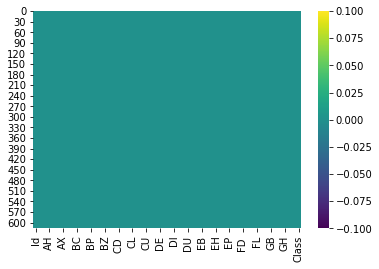

In [20]:
cols =traindata.columns
sns.heatmap(traindata[cols].isnull(), cmap='viridis')

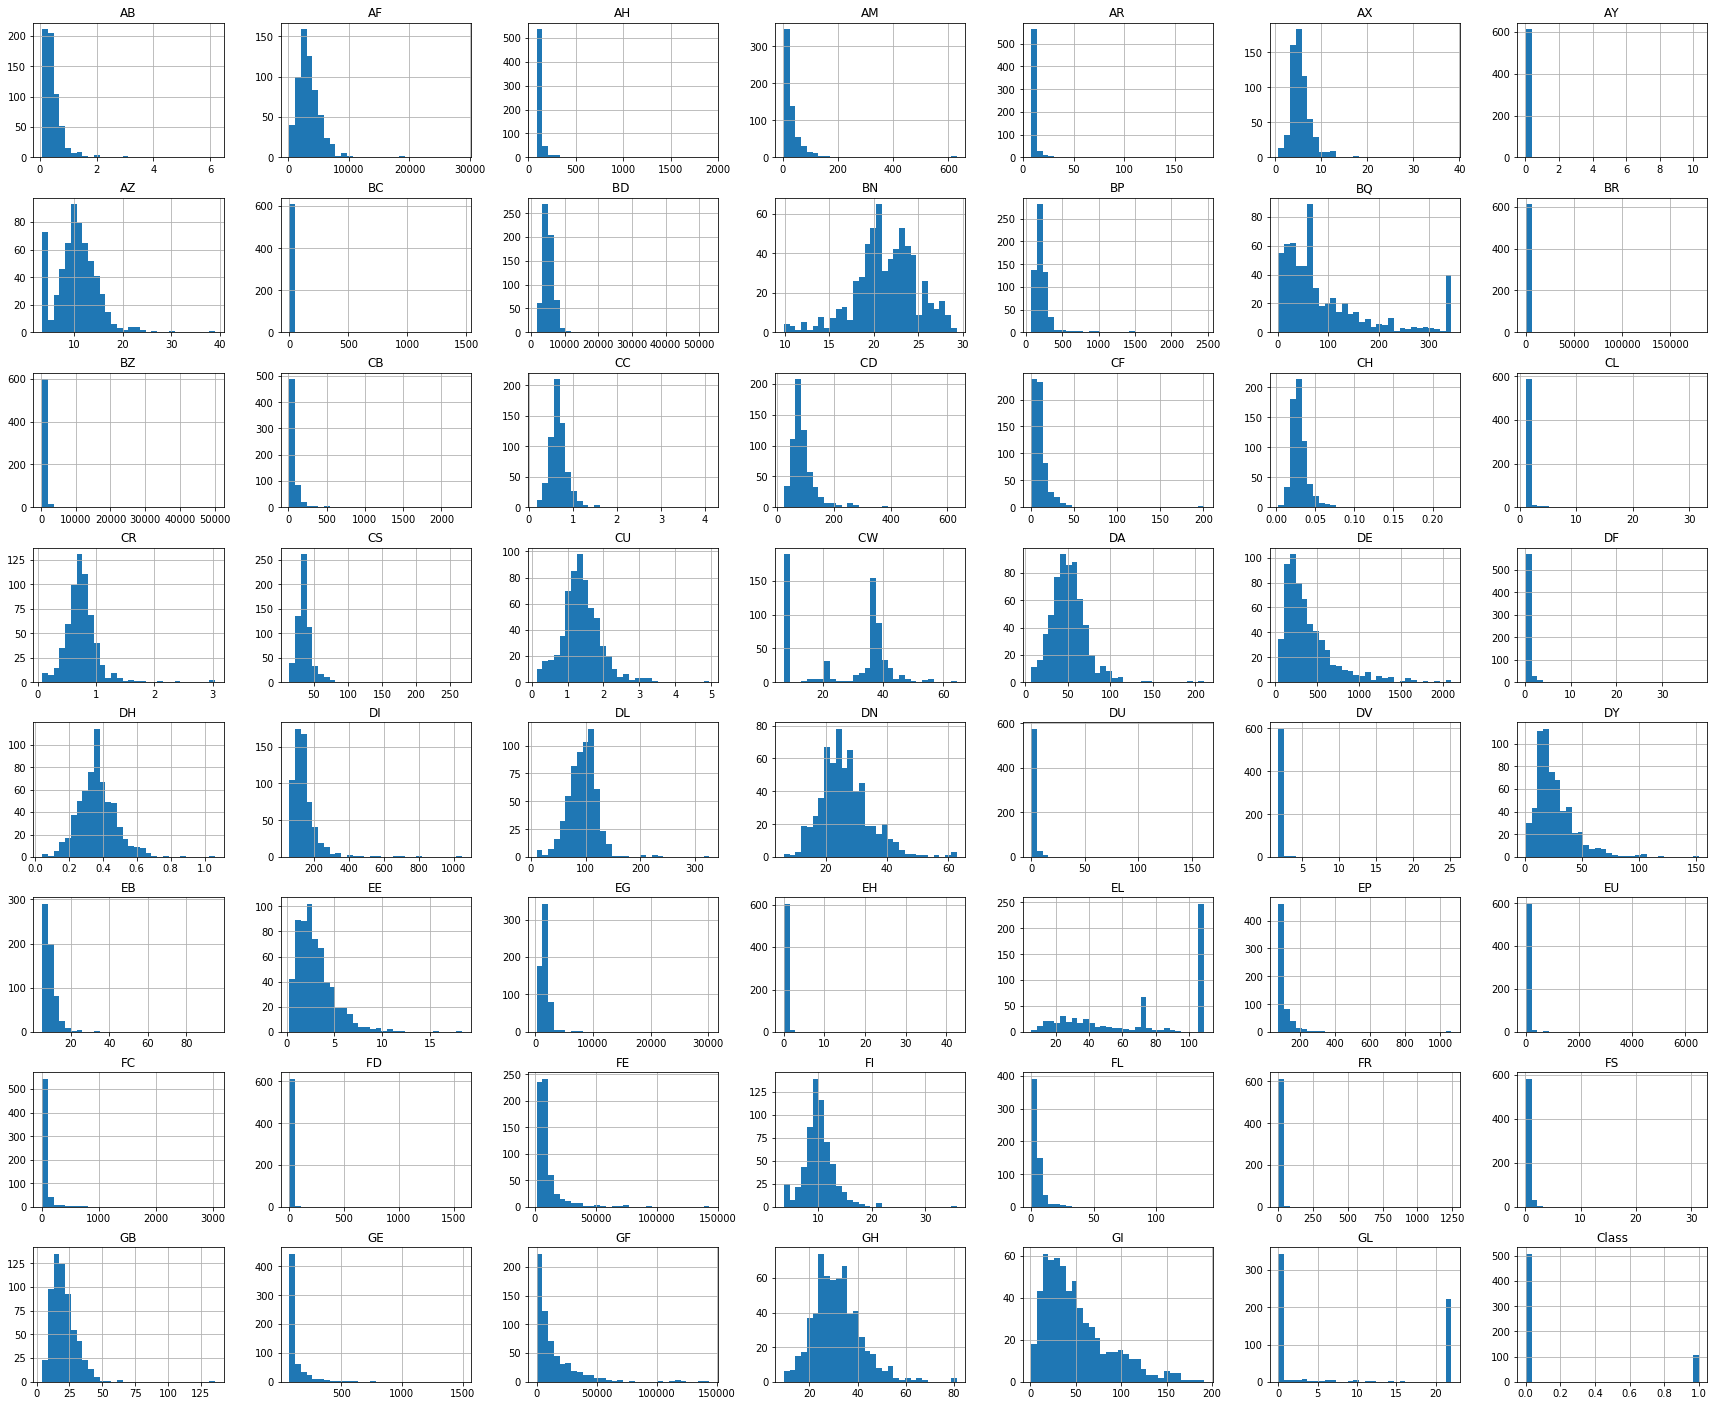

In [21]:
#Histogram of the Columns
traindata.hist(figsize = (30, 25), bins = 30, )
plt.show()

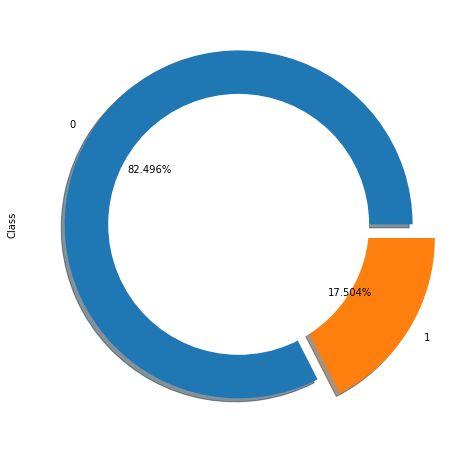

In [22]:
#Checking the distribution of Categorical Column "Class"

plt.figure(figsize = [8, 8], clear = True, )
traindata["Class"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True);

hole = plt.Circle((0, 0), 0.75, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

In [23]:
#get all numerical column 
numcol  = [col for col in traindata.columns if  traindata[col].dtype != "O"]
numcol

['AB',
 'AF',
 'AH',
 'AM',
 'AR',
 'AX',
 'AY',
 'AZ',
 'BC',
 'BD ',
 'BN',
 'BP',
 'BQ',
 'BR',
 'BZ',
 'CB',
 'CC',
 'CD ',
 'CF',
 'CH',
 'CL',
 'CR',
 'CS',
 'CU',
 'CW ',
 'DA',
 'DE',
 'DF',
 'DH',
 'DI',
 'DL',
 'DN',
 'DU',
 'DV',
 'DY',
 'EB',
 'EE',
 'EG',
 'EH',
 'EL',
 'EP',
 'EU',
 'FC',
 'FD ',
 'FE',
 'FI',
 'FL',
 'FR',
 'FS',
 'GB',
 'GE',
 'GF',
 'GH',
 'GI',
 'GL',
 'Class']

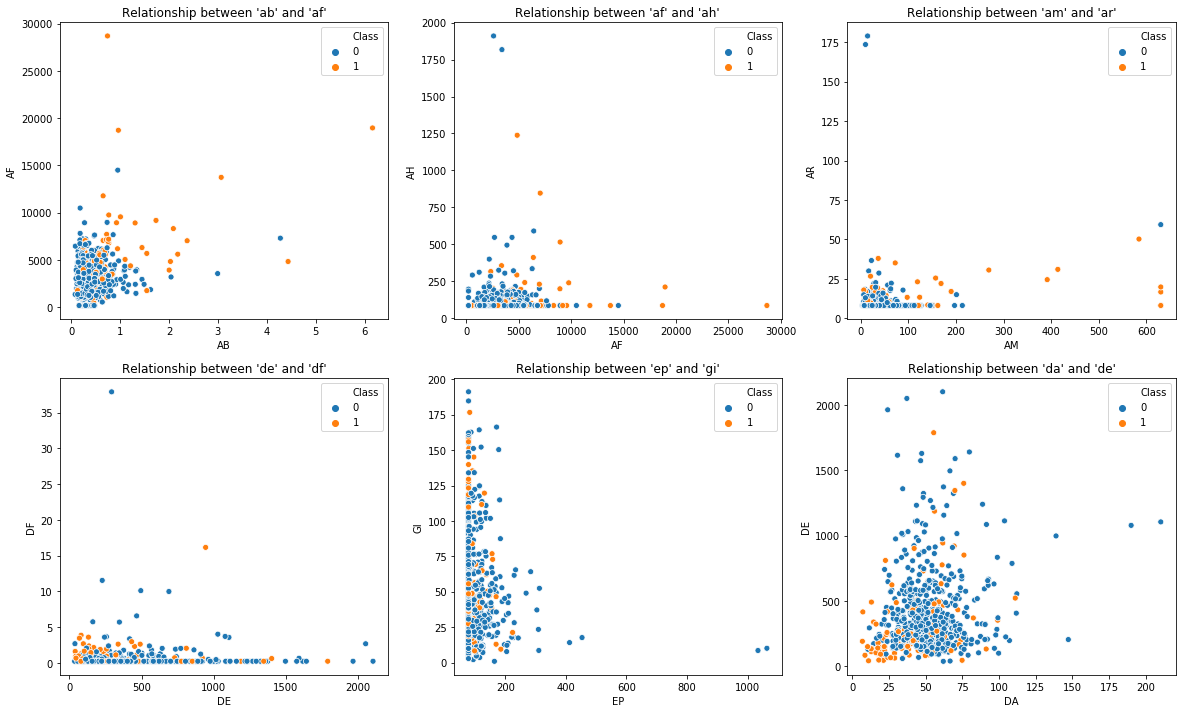

In [24]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "AB", y = "AF",
                hue = "Class",  sizes=(20, 100), legend="full",
                data = traindata).set(title = "Relationship between 'ab' and 'af'");

sns.scatterplot(ax = axes[1], x = "AF", y = "AH", hue = "Class",
                sizes=(20, 100), legend="full",
                data = traindata).set(title = "Relationship between 'af' and 'ah'");

sns.scatterplot(ax = axes[2], x = "AM", y = "AR", hue = "Class"
                , sizes=(20, 100), legend="full",
                data = traindata).set(title = "Relationship between 'am' and 'ar'");

sns.scatterplot(ax = axes[3], x = "DE", y = "DF", hue = "Class",
                sizes=(20, 100), legend="full",
                data = traindata).set(title = "Relationship between 'de' and 'df'");

sns.scatterplot(ax = axes[4], x = "EP", y = "GI", hue = "Class",
                 sizes=(20, 100), legend="full",
                data = traindata).set(title = "Relationship between 'ep' and 'gi'");

sns.scatterplot(ax = axes[5], x = "DA", y = "DE", hue = "Class",
                 sizes=(20, 100), legend="full",
                data = traindata).set(title = "Relationship between 'da' and 'de'");

In [25]:
dataset2 = traindata[['AB',
 'AF',
 'AH',
 'AM',
 'AR',
 'AX',
 'AY',
 'AZ',
 'BC',
 'BD ',
 'BN',
 'BP',
 'BQ',
 'BR',
 'BZ',
 'CB',
 'CC',
 'CD ',
 'CF',
 'CH',
 'CL',
 'CR',
 'CS',
 'CU',
 'CW ',
 'DA',
 'DE',
 'DF',
 'DH',
 'DI',
 'DL',
 'DN',
 'DU',
 'DV',
 'DY',
 'EB',
 'EE',
 'EG',
 'EH',
 'EL',
 'EP',
 'EU',
 'FC',
 'FD ',
 'FE',
 'FI',
 'FL',
 'FR',
 'FS',
 'GB',
 'GE',
 'GF',
 'GH',
 'GI',
 'GL']]

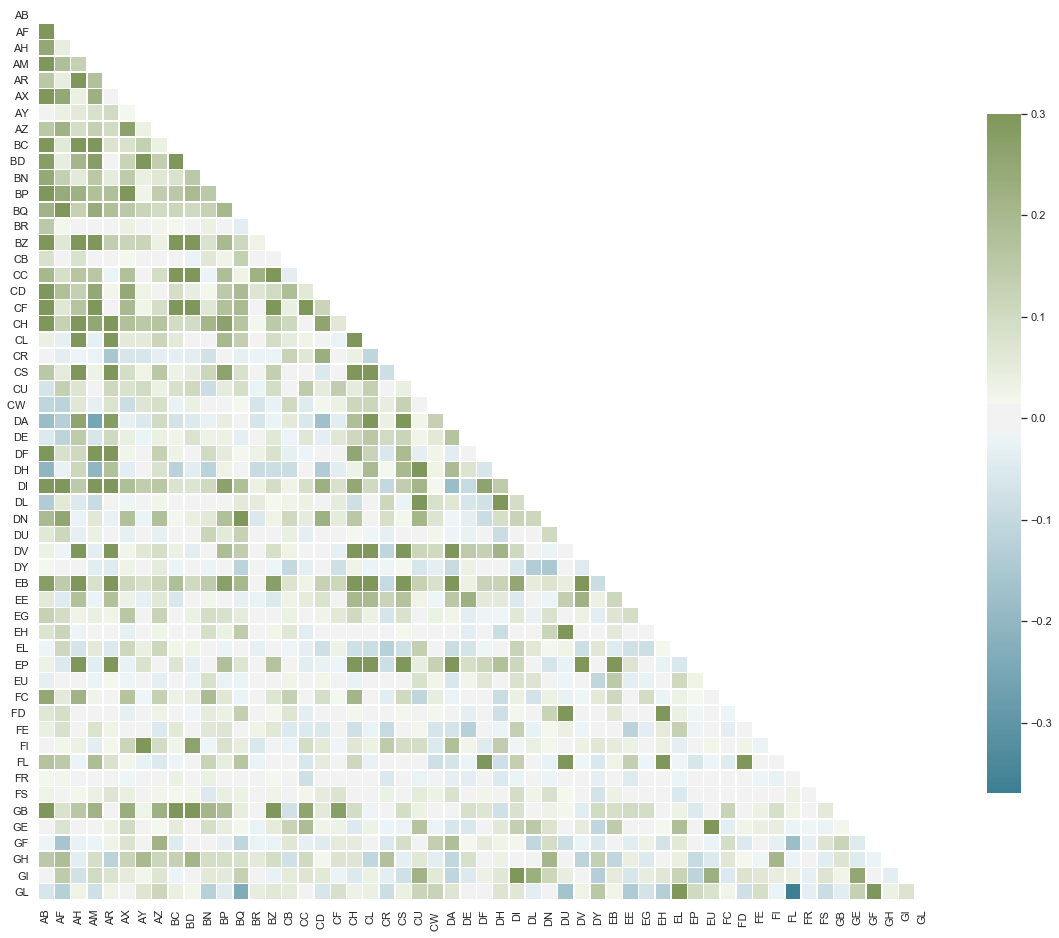

In [26]:
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = dataset2.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(20, 25))
cmap = sn.diverging_palette(220, 108, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

calc_vif(dataset2)

,variables,VIF
0,AB,7.152165
1,AF,5.373806
2,AH,11.575007
3,AM,2.771754
4,AR,14.522275
5,AX,10.270674
6,AY,2.483956
7,AZ,9.940902
8,BC,9.774931
9,BD,23.011888


In [ ]:
#Dropping columns - BD BN CH CL CS DH DL DN EH EP FD FI GH DV  as highly correlated

In [50]:
print(traindata.columns)

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')


In [51]:
# Some column names are having trailing spaces. Just try to print the column names & verify.
traindata.columns = traindata.columns.str.strip()

In [52]:
##traindata.drop(['DV'], axis=1,inplace=True)
traindata.drop(['BN'], axis=1,inplace=True)
traindata.drop(['EH'], axis=1,inplace=True)
traindata.drop(['CH'], axis=1,inplace=True)
traindata.drop(['CL'], axis=1,inplace=True)
traindata.drop(['CS'], axis=1,inplace=True)
traindata.drop(['DH'], axis=1,inplace=True)
traindata.drop(['DL'], axis=1,inplace=True)
traindata.drop(['DN'], axis=1,inplace=True)
traindata.drop(['EP'], axis=1,inplace=True)
traindata.drop(['FI'], axis=1,inplace=True)
traindata.drop(['BD'], axis=1,inplace=True)
traindata.drop(['GH'], axis=1,inplace=True)
traindata.drop(['DV'], axis=1,inplace=True)

In [53]:
traindata

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BP,BQ,BR,BZ,CB,CC,CD,CF,CR,CU,CW,DA,DE,DF,DI,DU,DY,EB,EE,EG,EJ,EL,EU,FC,FD,FE,FL,FR,FS,GB,GE,GF,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.069225,1.302012,36.205956,69.08340,295.570575,0.238680,89.245560,5.310690,23.187704,7.294176,1.987283,1433.166750,B,30.879420,3.828384,13.394640,10.265073,9028.291921,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,1.117800,1.357182,37.476568,70.79836,178.553100,0.238680,110.581815,0.005518,17.222328,4.926396,0.858603,1111.287150,A,109.125159,52.260480,17.175984,0.296850,6785.003474,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.700350,1.009611,21.459644,70.81970,321.426625,0.238680,120.056438,1.289739,36.861352,7.813674,8.146651,1494.076488,B,109.125159,5.390628,224.207424,8.745201,8338.906181,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.636075,0.722727,21.530392,47.27586,196.607985,0.238680,139.824570,2.655345,52.003884,7.386060,3.813326,15691.552180,B,31.674357,31.323372,59.301984,7.884336,10965.766040,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.693150,0.827550,34.415360,74.06532,200.178160,0.238680,97.920120,1.144902,9.064856,7.350720,3.490846,1403.656300,B,109.125159,51.141336,29.102640,4.274640,16198.049590,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,167.877117,27.287375,365.516874,257.432377,41.368691,0.691257,55.163024,4.780452,0.698250,1.070298,7.030640,21.75904,355.930925,0.238680,176.977590,0.005518,32.508604,8.015112,1.354416,495.086300,A,51.618996,65.821872,29.708112,0.296850,17167.209610,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,285.628059,344.644105,505.006814,257.432377,61.910576,0.772304,85.233928,6.682597,0.761025,2.146113,33.648356,43.90996,157.393715,0.238680,192.598575,0.648318,18.197092,8.976360,0.753797,1722.674025,B,109.125159,447.657600,69.343680,6.067614,18460.330020,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,178.661133,103.988995,2083.880500,257.432377,90.411867,0.708616,142.680216,7.809288,0.879825,1.489590,36.807176,104.62032,223.209115,0.238680,218.915925,0.005518,47.552312,9.478188,2.225112,2565.402825,A,109.125159,3.828384,71.725584,0.296850,5088.922912,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,119.162529,61.642115,722.377629,257.432377,12.499760,0.602254,122.939496,2.964975,0.583125,1.

In [55]:
dataset2 = traindata[['AB',
 'AF',
 'AH',
 'AM',
 'AR',
 'AX',
 'AY',
 'AZ',
 'BC',
 'BP',
 'BQ',
 'BR',
 'BZ',
 'CB',
 'CC',
 'CF',
 'CR',
 'CU',
 'DA',
 'DE',
 'DF',
 'DI',
 'DU',
 'DY',
 'EB',
 'EE',
 'EG',
 'EL',
 'EU',
 'FC',
 'FE',
 'FL',
 'FR',
 'FS',
 'GB',
 'GE',
 'GF',
 'GI',
 'GL']]

In [56]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

calc_vif(dataset2)

,variables,VIF
0,AB,5.755848
1,AF,4.899044
2,AH,8.695523
3,AM,2.559254
4,AR,10.442353
5,AX,9.712722
6,AY,1.124517
7,AZ,9.058145
8,BC,6.601799
9,BP,3.846272


In [57]:
#Incase if user_id is an object:
    
identity = traindata["Id"]
traindata = traindata.drop(columns="Id")



In [58]:
#Convert rest of categorical variable into dummy:
traindata= pd.get_dummies(traindata)


In [59]:
#Rejoin userid to dataset:
traindata = pd.concat([traindata, identity], axis = 1)

In [60]:
#Identify response variable:
    
response = traindata["Class"]
traindata = traindata.drop(columns="Class")

In [61]:
#Splitting dataset into training and test set with an 80%-20% ratio.

X_train, X_test, y_train, y_test = train_test_split(traindata,
response,stratify=response, test_size = 0.2,)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (493, 45)
Number transactions y_train dataset:  (493,)
Number transactions X_test dataset:  (124, 45)
Number transactions y_test dataset:  (124,)


In [62]:
#Separate ‘Id’ from training and test data frames.

train_identity = X_train['Id']
X_train = X_train.drop(columns = ['Id'])
test_identity = X_test['Id']
X_test = X_test.drop(columns = ['Id'])

# Model Selection

In [ ]:
#Identify the optimal number of trees for Random Forest Model

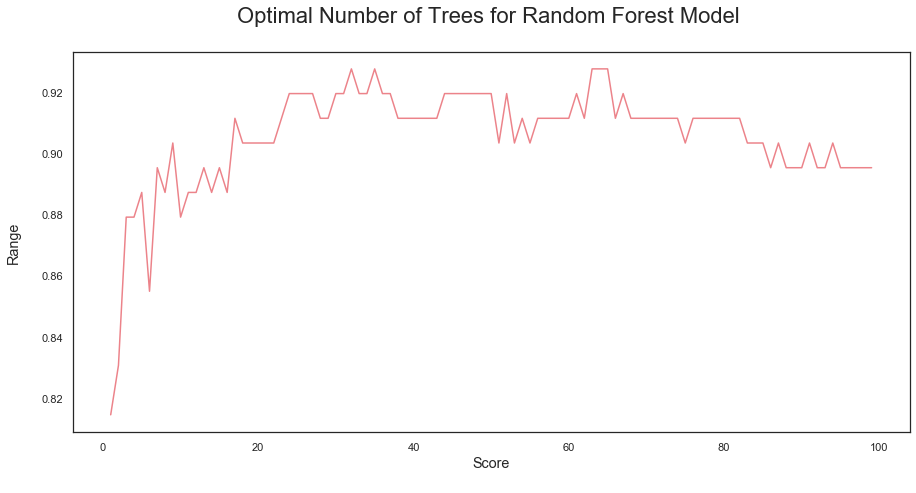

In [63]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
#the random forest model would attain the highest accuracy score when its n_estimators = 64.

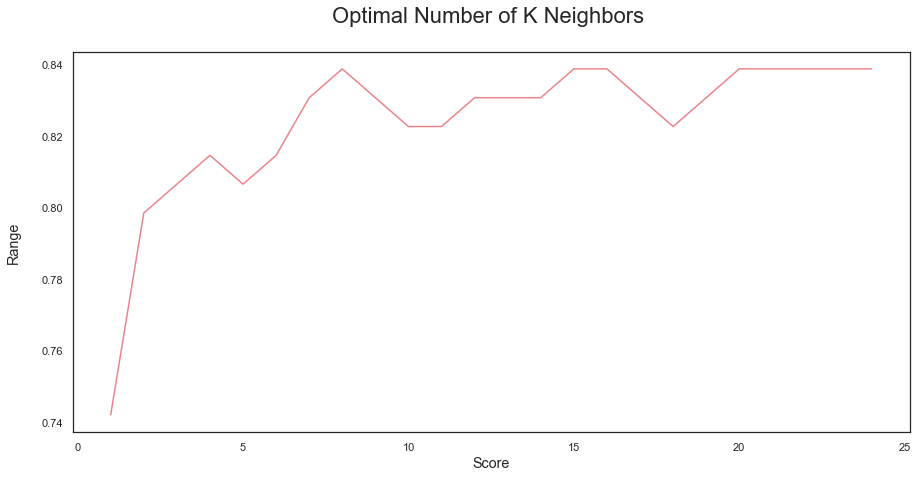

In [64]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
#if we use K = 8, then we will get the maximum score of 84%.

In [65]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

C:\Users\Pinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.830645   0.529412  0.409091  0.461538  0.428571


In [66]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
1        Decision Tree  0.854839   0.590909  0.590909  0.590909  0.590909
0  Logistic Regression  0.830645   0.529412  0.409091  0.461538  0.428571


In [67]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 64
                                    , 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix 
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2        Random Forest  0.911290   0.866667  0.590909  0.702703  0.631068
0        Decision Tree  0.854839   0.590909  0.590909  0.590909  0.590909
1  Logistic Regression  0.830645   0.529412  0.409091  0.461538  0.428571


In [68]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 8, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0         Random Forest  0.911290   0.866667  0.590909  0.702703  0.631068
3  K-Nearest Neighbours  0.838710   0.600000  0.272727  0.375000  0.306122
1         Decision Tree  0.854839   0.590909  0.590909  0.590909  0.590909
2   Logistic Regression  0.830645   0.529412  0.409091  0.461538  0.428571


# We will selelct Model Random Forest due to higher accuracy

In [69]:
from sklearn.ensemble import RandomForestClassifier
m1= RandomForestClassifier(n_estimators=64, min_samples_leaf=3, max_features=0.7, n_jobs=-1, oob_score=True)
m1.fit(X_train,y_train)
m1.score(X_test,y_test)

0.9112903225806451

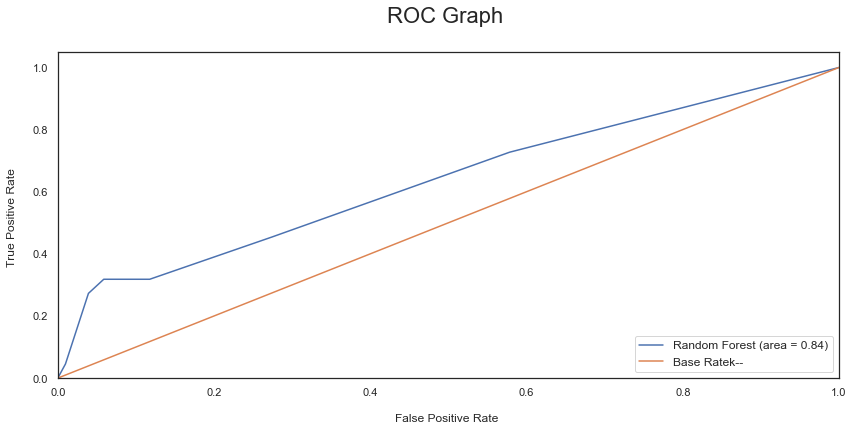

In [70]:
# Evaluate the model using ROC Graph: It’s good to re-evaluate the model using ROC Graph. 
#ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score. 
#The orange line represents the ROC curve of a random classifier while a good classifier tries to remain as far- 
#-away from that line as possible. As shown in the graph below, the fine-tuned Random Forest model showcased a-
#-higher AUC score.

m1.fit(X_train, y_train) 
probs = m1.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, 
label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [71]:
# Analyzing Coefficients
#Predict Feature Importance: Random Forest allows us to determine the key features that have significance in predicting the 
#target attribute (“Class” in this project).
feature_importances = pd.DataFrame(m1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances


,importance
DU,0.248715
CR,0.063240
DI,0.059072
DE,0.058750
DA,0.056084
FR,0.052693
AB,0.038576
FL,0.035931
BC,0.025880
CC,0.024932


In [ ]:
#apply the smote to overcome the problem of data imbalance

In [72]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=64)
X, y = smote_enn.fit_resample(X_train, y_train)

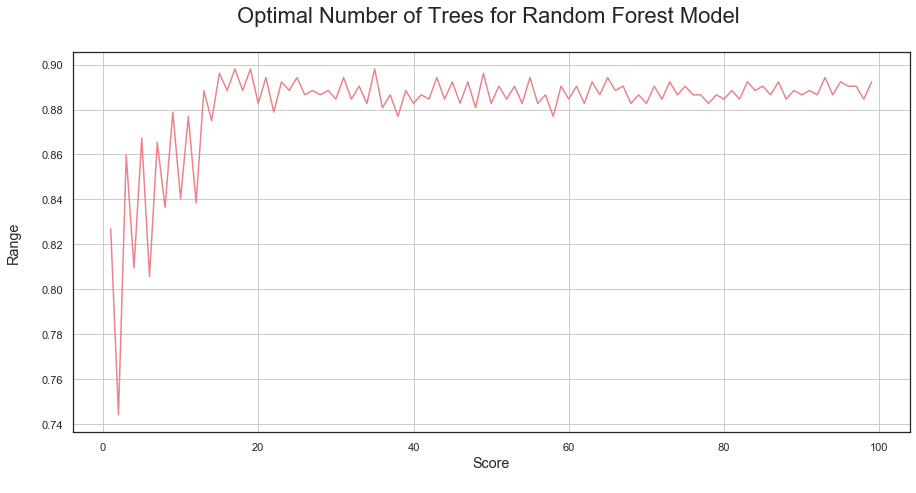

In [73]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X,y))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.grid()
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
m2= RandomForestClassifier(n_estimators= 40, min_samples_leaf=3, max_features=0.7, n_jobs=-1, oob_score=True)
m2.fit(X,y)
m2.score(X_test,y_test)

0.8951612903225806

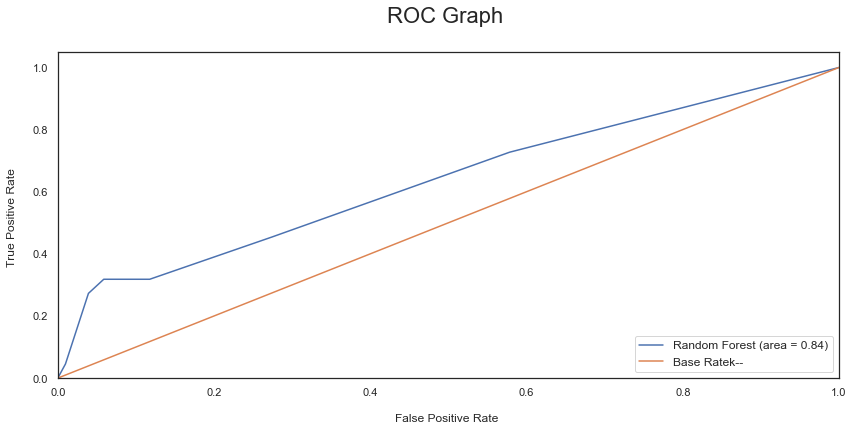

In [84]:
# Evaluate the model using ROC Graph: It’s good to re-evaluate the model using ROC Graph. 
#ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score. 
#The orange line represents the ROC curve of a random classifier while a good classifier tries to remain as far- 
#-away from that line as possible. As shown in the graph below, the fine-tuned Random Forest model showcased a-
#-higher AUC score.

m2.fit(X, y) 
probs = m1.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, 
label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


# Predict Feature Importance: Random Forest allows us to determine the key features that have significance in predicting the target attribute (“Class” in this project).

In [85]:
# Analyzing Coefficients
feature_importances = pd.DataFrame(m2.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
AF,0.207106
DU,0.201575
BQ,0.067354
AB,0.058798
GF,0.042871
DE,0.040442
CR,0.039506
EE,0.035072
EB,0.025062
CU,0.021998


In [86]:
# Predict the Test set results
y_pred = m2.predict(X_test)
#probability score
y_pred_probs = m1.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

In [95]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

### Predict Feature Importance: Random Forest allows us to determine the key features that have significance in predicting the target attribute (“Class” in this project).

[[88 14]
 [ 4 18]]
Test Data Accuracy: 0.8548


<Figure size 2016x1440 with 0 Axes>

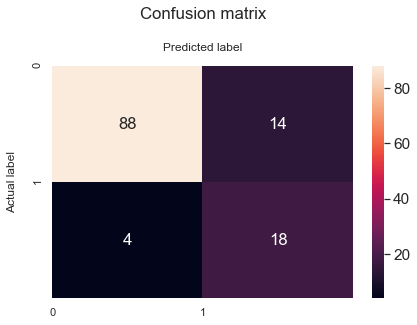

In [87]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# Final Results with Probablity Score

In [88]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_Class1(%)"] = y_pred_probs
final_results["propensity_to_Class1(%)"] = final_results["propensity_to_Class1(%)"]*100
final_results["propensity_to_Class1(%)"]=final_results["propensity_to_Class1(%)"].round(2)
final_results = final_results[['Id', 'Class', 'predictions', 'propensity_to_Class1(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_Class1(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

               Id  Class  predictions  propensity_to_Class1(%) Ranking
319  7feabcc65b6b      0            0                     0.00      10
520  d1fa22631c9c      0            0                     1.69       8
526  d3ce7974230c      1            0                    74.99       1
207  50183292c0e7      0            1                     0.00      10
516  d0ecfae80796      1            1                    60.76       2
..            ...    ...          ...                      ...     ...
33   0f9257f237b4      0            0                     2.62       7
570  e9c343dc7736      0            0                     1.04       9
75   1bac22586f27      1            1                    29.27       3
270  68c35486588c      0            0                     0.00       9
102  2901ef1394b9      0            1                    71.22       1

[124 rows x 5 columns]


In [ ]:
##You can now convert the Final Result to a data frame and extract as an excel file 

# Submission

In [101]:
testdata = pd.read_csv('test.csv')

In [90]:
testdata

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
#Incase if user_id is an object:
    
identity = testdata["Id"]
testdata = testdata.drop(columns="Id")

In [103]:
#Convert rest of categorical variable into dummy:
testdata= pd.get_dummies(testdata)

In [104]:
#Rejoin userid to dataset:
testdata = pd.concat([testdata, identity], axis = 1)

In [102]:
testdata

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,EJ_A,Id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,00eed32682bb
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,010ebe33f668
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,02fa521e1838
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,040e15f562a2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,046e85c7cc7f


In [94]:
testdata.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'EJ_A', 'Id'],
      dtype='object')

In [95]:
traindata.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BP', 'BQ', 'BR',
       'BZ', 'CB', 'CC', 'CD', 'CF', 'CR', 'CU', 'CW', 'DA', 'DE', 'DF', 'DI',
       'DU', 'DY', 'EB', 'EE', 'EG', 'EL', 'EU', 'FC', 'FD', 'FE', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GI', 'GL', 'EJ_A', 'EJ_B', 'Id'],
      dtype='object')

In [105]:
#Adding new column as EJ was converted earlier
testdata['EJ_B'] = 0

In [106]:
# Some column names are having trailing spaces. Just try to print the column names & verify.
testdata.columns = testdata.columns.str.strip()

In [107]:
##Dropping columns as per traindata correlation observation

testdata.drop(['BN'], axis=1,inplace=True)
testdata.drop(['EH'], axis=1,inplace=True)
testdata.drop(['CH'], axis=1,inplace=True)
testdata.drop(['CL'], axis=1,inplace=True)
testdata.drop(['CS'], axis=1,inplace=True)
testdata.drop(['DH'], axis=1,inplace=True)
testdata.drop(['DL'], axis=1,inplace=True)
testdata.drop(['DN'], axis=1,inplace=True)
testdata.drop(['EP'], axis=1,inplace=True)
testdata.drop(['FI'], axis=1,inplace=True)
testdata.drop(['BD'], axis=1,inplace=True)
testdata.drop(['GH'], axis=1,inplace=True)
testdata.drop(['DV'], axis=1,inplace=True)

In [108]:
testdata

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BP,BQ,BR,BZ,CB,CC,CD,CF,CR,CU,CW,DA,DE,DF,DI,DU,DY,EB,EE,EG,EL,EU,FC,FD,FE,FL,FR,FS,GB,GE,GF,GI,GL,EJ_A,Id,EJ_B
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,00eed32682bb,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,010ebe33f668,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,02fa521e1838,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,040e15f562a2,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,046e85c7cc7f,0


In [109]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      5 non-null      float64
 1   AF      5 non-null      float64
 2   AH      5 non-null      float64
 3   AM      5 non-null      float64
 4   AR      5 non-null      float64
 5   AX      5 non-null      float64
 6   AY      5 non-null      float64
 7   AZ      5 non-null      float64
 8   BC      5 non-null      float64
 9   BP      5 non-null      float64
 10  BQ      5 non-null      float64
 11  BR      5 non-null      float64
 12  BZ      5 non-null      float64
 13  CB      5 non-null      float64
 14  CC      5 non-null      float64
 15  CD      5 non-null      float64
 16  CF      5 non-null      float64
 17  CR      5 non-null      float64
 18  CU      5 non-null      float64
 19  CW      5 non-null      float64
 20  DA      5 non-null      float64
 21  DE      5 non-null      float64
 22  DF    

In [110]:
testdata = testdata.drop(columns=["Id"])

In [111]:
predictions = m2.predict_proba(testdata)
submission[['class_0', 'class_1']] = predictions

submission

,Id,class_0,class_1
0,00eed32682bb,0.739583,0.260417
1,010ebe33f668,0.739583,0.260417
2,02fa521e1838,0.739583,0.260417
3,040e15f562a2,0.739583,0.260417
4,046e85c7cc7f,0.739583,0.260417


In [114]:
submission.to_csv('submission.csv',index=False)